Outlier Detection and Removal Using Z-Score and Standard Deviation

In [1]:
"""
- If we have a dataset that follows normal distribution than we can use 3 or more standard deviation to spot outliers in the dataset. Many times these are legitimate values and it really depends on the situation if you want to remove them or not. But removing outliers can significantly increase the statistical power of machine learning model hence it is recommended that you treat outliers before building a model. 

- Z score indicates how many standard deviation away a given sample is. We are going to go through all this theory and write python code to remove outliers from heights dataset that I have taken it from kaggle.

- Standard deviation is a way to look at how far away our data points are from the mean value.

- Dataset: https://www.kaggle.com/datasets/mustafaali96/weight-height

NOTE:

- We can override the default plot size in Matplotlib using the rcParams parameter. This is useful when we want all our plots to follow a particular size.

"""

'\n- If we have a dataset that follows normal distribution than we can use 3 or more standard deviation to spot outliers in the dataset. Many times these are legitimate values and it really depends on the situation if you want to remove them or not. But removing outliers can significantly increase the statistical power of machine learning model hence it is recommended that you treat outliers before building a model. \n\n- Z score indicates how many standard deviation away a given sample is. We are going to go through all this theory and write python code to remove outliers from heights dataset that I have taken it from kaggle.\n\n- Standard deviation is a way to look at how far away our data points are from the mean value.\n\n- Dataset: https://www.kaggle.com/datasets/mustafaali96/weight-height\n\nNOTE:\n\n- We can override the default plot size in Matplotlib using the rcParams parameter. This is useful when we want all our plots to follow a particular size.\n\n'

In [2]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10, 6)

In [3]:
df = pd.read_csv("heights.csv")
df.sample(5)

,gender,height
144,Male,69.471106
3891,Male,69.674818
6266,Female,64.435233
7648,Female,66.484327
3641,Male,69.331800


In [4]:
df.height.describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: height, dtype: float64

In [5]:
""" 
What is Histogram?

- Histograms are graphical representations of data distributions. They consist of bars, each representing the frequency or count of observations falling within specific intervals, known as bins. We can also say a histogram is a variation of a bar chart in which data values are grouped together and put into different classes. This grouping enables us to see how frequently data in each class occur in the dataset. 

- The histogram graphically shows the following:
    1. Frequency of different data points in the dataset.
    2. Location of the center of data.
    3. The spread of dataset.
    4. Skewness/Variance of dataset.
    5. Presence of outliers in the dataset.

- The histogram contains the following axes:
    1. Vertical Axis: Frequency/count of each bin.
    2. Horizontal Axis: List of bins/categories.

- SciPy is actually a library in Python. It is built on top of NumPy and provides additional functionality for scientific computing, such as optimization, linear algebra, signal processing, and more.

Read this awesome article to get your fundamentals clear on normal distribution, bell curve and standard deviation. https://www.mathsisfun.com/data/standard-normal-distribution.html

"""

' \nWhat is Histogram?\n\n- Histograms are graphical representations of data distributions. They consist of bars, each representing the frequency or count of observations falling within specific intervals, known as bins. We can also say a histogram is a variation of a bar chart in which data values are grouped together and put into different classes. This grouping enables us to see how frequently data in each class occur in the dataset. \n\n- The histogram graphically shows the following:\n    1. Frequency of different data points in the dataset.\n    2. Location of the center of data.\n    3. The spread of dataset.\n    4. Skewness/Variance of dataset.\n    5. Presence of outliers in the dataset.\n\n- The histogram contains the following axes:\n    1. Vertical Axis: Frequency/count of each bin.\n    2. Horizontal Axis: List of bins/categories.\n\n- SciPy is actually a library in Python. It is built on top of NumPy and provides additional functionality for scientific computing, such as

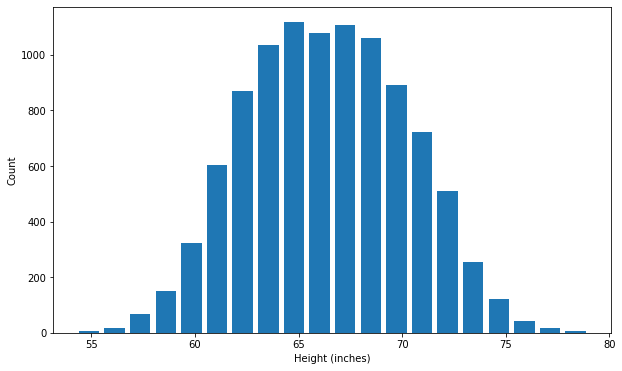

In [6]:
# Plot histogram to understand data distribution and we found that it's normally distributed.
plt.hist(df.height, bins = 20, rwidth = 0.8)
plt.xlabel('Height (inches)')
plt.ylabel('Count')
plt.show()

In [7]:
""" 
# Create an array with elements from 5 to 10
array = np.arange(5, 10)
print(array)

# Output: [5 6 7 8 9]

"""

' \n# Create an array with elements from 5 to 10\narray = np.arange(5, 10)\nprint(array)\n\n# Output: [5 6 7 8 9]\n\n'

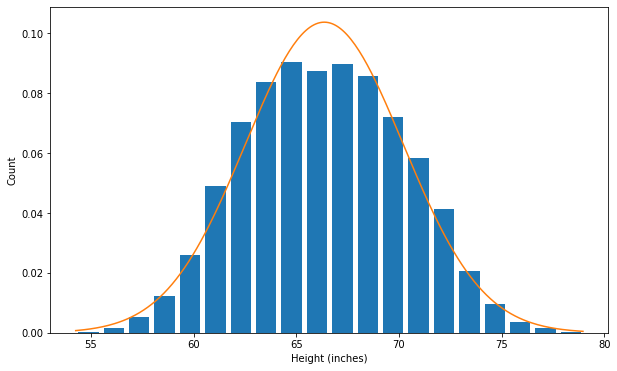

In [8]:
# Plot bell curve along with histogram for our dataset
from scipy.stats import norm
import numpy as np

""" 
    density = True -> Normalizes the histogram so that the total area under the histogram is equal to 1, making it a probability density histogram.

    norm.pdf() -> Calculates the probability density at each point in the range rng, using the mean and standard deviation of the 'height' column as parameters. 
    
    The resulting curve represents the theoretical normal distribution of the data.
"""
plt.hist(df.height, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(df.height.min(), df.height.max(), 0.1)
plt.plot(rng, norm.pdf(rng, df.height.mean(), df.height.std()))

In [9]:
df.height.mean()

66.367559754866

In [10]:
df.height.std()

3.847528120795573

Outlier Detection And Removal Using 3 Standard Deviation

In [11]:
"""
- One of the ways we can remove outliers is remove any data points that are beyond 3 standard deviation from mean. Which means we can come up with following upper and lower bounds.

- 3 Standard Deviation is common practice in industry, but we can also use 4 or 5 SD.
"""
upper_limit = df.height.mean() + 3 * df.height.std()
print(upper_limit)

lower_limit = df.height.mean() - 3 * df.height.std()
print(lower_limit)

77.91014411725271
54.824975392479274


In [12]:
# Outliers
df[(df.height > upper_limit) | (df.height < lower_limit)]

,gender,height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


In [13]:
""" 
Above the heights on higher end is 78 inch which is around 6 ft 6 inch. Now that is quite unusual height. There are people who have this height but it is very uncommon and it is ok if you remove those data points. Similarly on lower end it is 54 inch which is around 4 ft 6 inch. While this is also a legitimate height you don't find many people having this height so it is safe to consider both of these cases as outliers.

"""

" \nAbove the heights on higher end is 78 inch which is around 6 ft 6 inch. Now that is quite unusual height. There are people who have this height but it is very uncommon and it is ok if you remove those data points. Similarly on lower end it is 54 inch which is around 4 ft 6 inch. While this is also a legitimate height you don't find many people having this height so it is safe to consider both of these cases as outliers.\n\n"

In [14]:
# Remove Outliers
df_no_outlier_std_dev = df[(df.height < upper_limit) & (df.height > lower_limit)]
df_no_outlier_std_dev.head()

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


In [15]:
df_no_outlier_std_dev.shape

(9993, 2)

In [16]:
df.shape

(10000, 2)

In [17]:
df.shape[0] - df_no_outlier_std_dev.shape[0]

7

Outlier Detection And Removal Using Z Score

In [18]:
""" 
- Z score is a way to achieve the same thing that we did in the above method.

- Z score indicates how many standard deviation away a data point is.

- For example:

    In our case mean is 66.37 and standard deviation is 3.84. If a value of a data point is 77.91 then Z score for that is 3 because it is 3 standard deviation away (77.91 = 66.37 + 3 * 3.84)
"""

' \n- Z score is a way to achieve the same thing that we did in the above method.\n\n- Z score indicates how many standard deviation away a data point is.\n\n- For example:\n\n    In our case mean is 66.37 and standard deviation is 3.84. If a value of a data point is 77.91 then Z score for that is 3 because it is 3 standard deviation away (77.91 = 66.37 + 3 * 3.84)\n'

In [19]:
df["Z-Score"] = (df.height - df.height.mean()) / df.height.std()
df.head(5)

,gender,height,Z-Score
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


In [20]:
(73.84 - 66.37) / 3.84

1.9453124999999998

In [21]:
df[df["Z-Score"] > 3]

,gender,height,Z-Score
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854


In [22]:
df[df["Z-Score"] < -3]

,gender,height,Z-Score
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [23]:
# Outliers
df[(df["Z-Score"] > 3) | (df["Z-Score"] < -3)]

,gender,height,Z-Score
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [24]:
# Remove Outliers
df_no_outliers = df[(df["Z-Score"] > -3) & (df["Z-Score"] < 3)]
df_no_outliers.head()

,gender,height,Z-Score
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


In [25]:
df_no_outliers.shape

(9993, 3)

In [26]:
df.shape

(10000, 3)